# Análisis comparativo del desempeño financiero de los bancos líderes en España: Banco Santander, BBVA, CaixaBank y Bankinter
En el mundo financiero altamente competitivo de hoy, comprender y evaluar el desempeño de los bancos es esencial para los inversores, analistas y líderes empresariales. En este proyecto, se lleva a cabo un análisis exhaustivo del mercado financiero español, centrándonos en cuatro de los bancos más prominentes: Banco Santander, BBVA, CaixaBank y Bankinter.

El objetivo principal de este estudio es examinar y comparar el desempeño financiero de estos bancos líderes en términos de rendimiento de acciones, volatilidad, métricas de riesgo y correlaciones. Para ello, se utilizan datos históricos de precios de las acciones y se aplican diversas técnicas y herramientas de análisis.

A lo largo de este informe, exploraremos el panorama financiero de cada banco, evaluando sus fortalezas y debilidades, así como identificando las tendencias y patrones significativos en sus precios de acciones. Además, se calcularán métricas clave de rendimiento y se realizará un análisis comparativo detallado para destacar las diferencias y similitudes entre estos actores clave del mercado bancario español.

Este proyecto proporcionará una visión profunda y perspicaz de cómo estos bancos han evolucionado en los últimos años, brindando una base sólida para la toma de decisiones informada y estratégica en el ámbito financiero. Los resultados y conclusiones obtenidos servirán como punto de referencia para inversores, analistas y cualquier persona interesada en comprender y seguir de cerca el rendimiento de los principales bancos en España.

Con el fin de comprender el panorama financiero español y tomar decisiones fundamentadas, este análisis comparativo de los bancos Banco Santander, BBVA, CaixaBank y Bankinter se presenta como una valiosa herramienta para evaluar el desempeño y el potencial de crecimiento en el sector bancario.

In [1]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# Lista de símbolos de los bancos
bancos_list = ['SAN.MC', 'BBVA.MC', 'CABK.MC', 'BKT.MC']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Descargar datos históricos de los bancos
bancos_data = {}
for banco in bancos_list:
    bancos_data[banco] = yf.download(banco, start, end)

# Crear una columna para el nombre de la empresa
company_name = ["Banco Santander", "BBVA", "CaixaBank", "Bankinter"]
for banco, name in zip(bancos_data.values(), company_name):
    banco["company_name"] = name

# Concatenar los datos de los bancos en un solo DataFrame
df = pd.concat(bancos_data.values(), axis=0)

df.tail(10)

C:\Users\jaime\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-31,5.460,5.550,5.340,5.342,5.342,3012583,Bankinter
2023-06-01,5.396,5.528,5.390,5.496,5.496,1541774,Bankinter
2023-06-02,5.538,5.640,5.490,5.604,5.604,5189570,Bankinter
2023-06-05,5.646,5.668,5.560,5.562,5.562,1372329,Bankinter
2023-06-06,5.524,5.628,5.500,5.610,5.610,1878897,Bankinter
2023-06-07,5.596,5.686,5.594,5.676,5.676,1852448,Bankinter
2023-06-08,5.690,5.744,5.684,5.710,5.710,2083558,Bankinter
2023-06-09,5.698,5.744,5.616,5.708,5.708,1924750,Bankinter
2023-06-12,5.712,5.776,5.630,5.662,5.662,1528347,Bankinter


In [2]:
# Summary Stats
bancos_data['SAN.MC'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,257.000000,257.000000,257.000000,257.000000,257.000000,2.570000e+02
mean,2.918430,2.958911,2.878148,2.919831,2.853260,4.954936e+07
std,0.395586,0.399587,0.390853,0.394629,0.412647,3.462344e+07
min,2.344500,2.395000,2.324000,2.337500,2.244933,1.379921e+07
25%,2.590000,2.628500,2.554500,2.590000,2.510964,2.905171e+07
50%,2.796500,2.827000,2.774000,2.802500,2.747950,3.989653e+07
75%,3.225000,3.249000,3.162000,3.209000,3.197000,5.748424e+07
max,3.846500,3.872500,3.795500,3.858000,3.788312,3.045400e+08


In [3]:
# General info
bancos_data['SAN.MC'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2022-06-14 to 2023-06-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          257 non-null    float64
 1   High          257 non-null    float64
 2   Low           257 non-null    float64
 3   Close         257 non-null    float64
 4   Adj Close     257 non-null    float64
 5   Volume        257 non-null    int64  
 6   company_name  257 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 16.1+ KB


# Precio de Cierre Ajustado

El precio de cierre ajustado (Adjusted Close) es una versión del precio de cierre de una acción que se ha ajustado para tener en cuenta eventos corporativos, como dividendos, divisiones de acciones o fusiones, que podrían afectar el valor de la acción.

El precio de cierre ajustado se calcula teniendo en cuenta estos eventos y realizando los ajustes necesarios en el precio de cierre estándar. Estos ajustes permiten obtener una medida más precisa del rendimiento de una acción a lo largo del tiempo, eliminando el impacto de eventos que no están directamente relacionados con la valoración de la acción en el mercado.

El código a continuación visualiza los precios de cierre ajustados de diferentes acciones de bancos utilizando gráficos de línea individuales para cada acción. Esto permite comparar y analizar la evolución de los precios de cierre de cada banco a lo largo del tiempo.

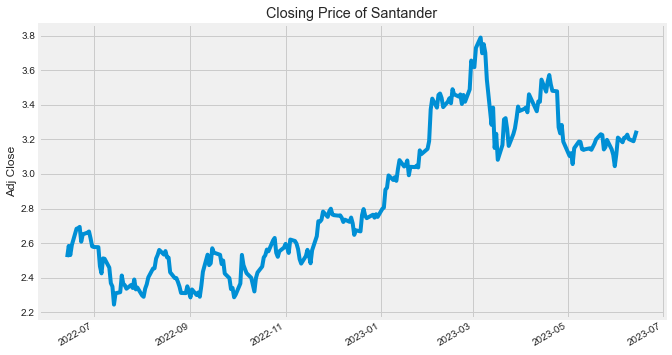

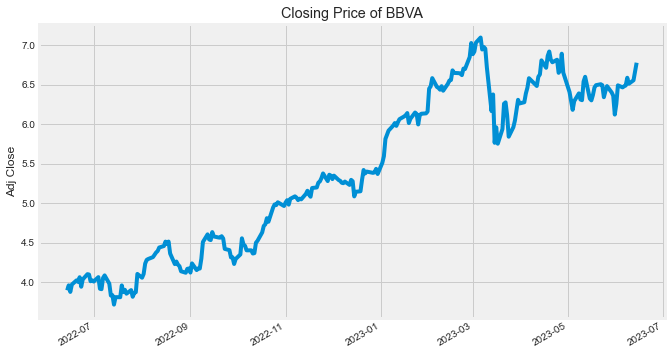

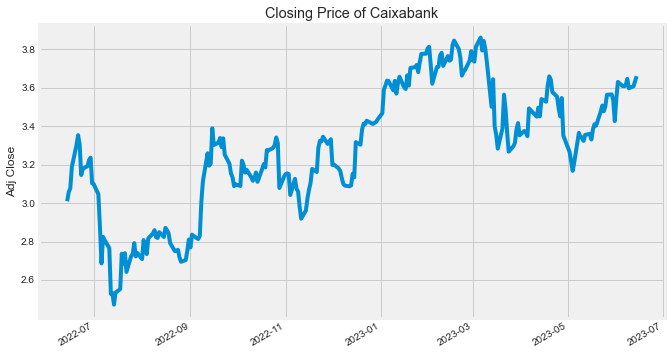

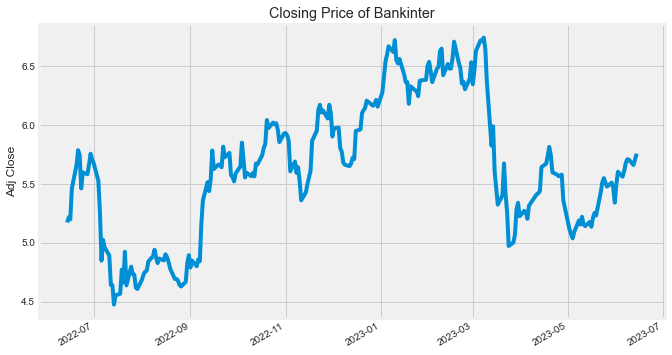

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bancos_data['SAN.MC']['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Santander")

plt.show()

plt.figure(figsize=(10, 6))
bancos_data['BBVA.MC']['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of BBVA")

plt.show()

plt.figure(figsize=(10, 6))
bancos_data['CABK.MC']['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Caixabank")

plt.show()

plt.figure(figsize=(10, 6))
bancos_data['BKT.MC']['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Bankinter")

plt.show()


# Volumen de ventas
El volumen de ventas, también conocido como volumen de negociación o volumen de operaciones, se refiere a la cantidad total de acciones (o cualquier otro activo financiero) que se compran y venden en un mercado durante un período de tiempo específico.

Representa la cantidad de transacciones realizadas en un activo financiero en un determinado período, y se expresa en términos de la cantidad de acciones o contratos negociados.

El volumen de ventas es un indicador importante en el análisis financiero y técnico. Proporciona información sobre la liquidez y la actividad del mercado, ya que un alto volumen de ventas indica una mayor participación y actividad de los inversores. Por otro lado, un volumen de ventas bajo puede indicar falta de interés o participación limitada en un activo financiero.

El análisis del volumen de ventas se utiliza para evaluar la fuerza de las tendencias de precios, confirmar patrones gráficos, identificar cambios de tendencia y generar señales de compra o venta. Los traders y analistas a menudo consideran el volumen junto con el precio para obtener una imagen más completa de la dinámica del mercado.

Ahora vamos a mostrar el volumen de ventas diario para cada una de las empresas financieras (Santander, BBVA, Caixabank y Bankinter) en subgráficos individuales dentro de una figura más grande. Esto permite comparar visualmente los patrones y cambios en el volumen de ventas para cada empresa a lo largo del tiempo.

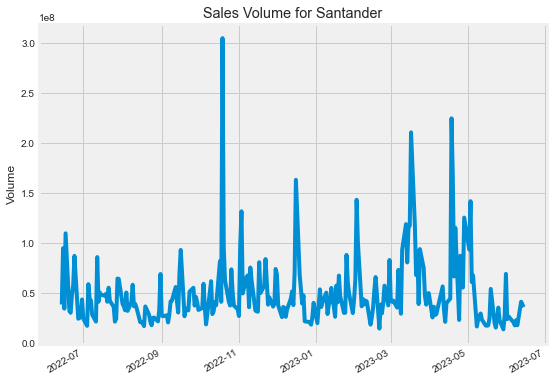

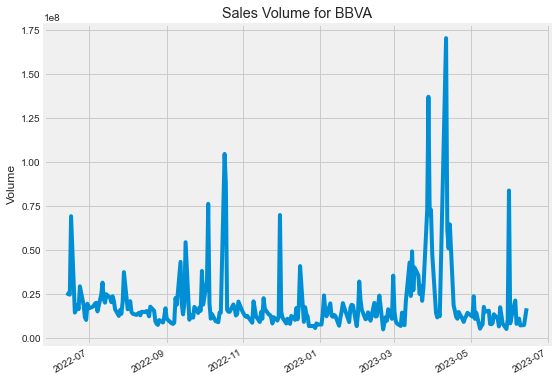

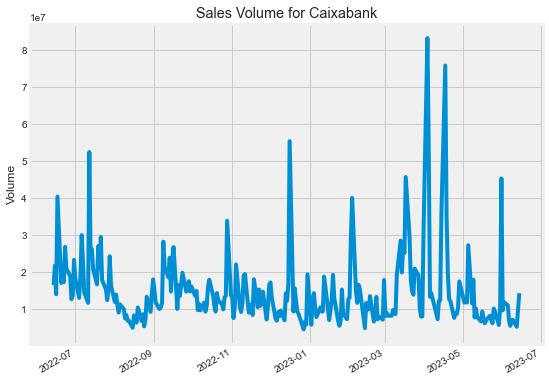

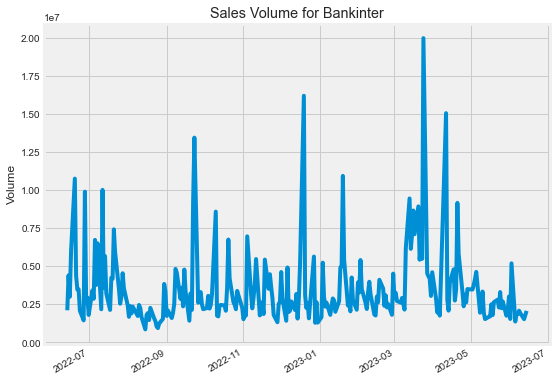

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.subplot(2, 2, 1)
bancos_data['SAN.MC']['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for Santander")
    
plt.tight_layout()


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.subplot(2, 2, 1)
bancos_data['BBVA.MC']['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for BBVA")
    
plt.tight_layout()


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.subplot(2, 2, 1)
bancos_data['CABK.MC']['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for Caixabank")
    
plt.tight_layout()


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.subplot(2, 2, 1)
bancos_data['BKT.MC']['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for Bankinter")
    
plt.tight_layout()

# 2. ¿Cuál era la media móvil de las distintas acciones?
La media móvil de las acciones es una técnica utilizada en el análisis financiero para suavizar las fluctuaciones del precio de una acción y determinar la tendencia general. Se calcula tomando el promedio de los precios de cierre de la acción en un período específico y desplazándolo a lo largo del tiempo.

La media móvil se calcula sumando los precios de cierre de las acciones durante un número determinado de períodos y dividiendo el resultado entre ese mismo número de períodos. Por ejemplo, si se utiliza una media móvil de 50 días, se sumarían los precios de cierre de las últimas 50 sesiones de negociación y se dividirían entre 50.

El objetivo de la media móvil es suavizar las fluctuaciones diarias del precio y proporcionar una visión más clara de la tendencia subyacente. Al calcular el promedio en un período determinado, la media móvil refleja la dirección general del precio de la acción a lo largo de ese período. Esto puede ayudar a los inversores y analistas a identificar tendencias alcistas, bajistas o cambios en la dirección de los precios.

Ahora, vamos a visualizar las medias móviles de los precios de cierre ajustados para las acciones de diferentes empresas, lo que ayudará a identificar tendencias y patrones en los datos de precios. Nuestro gráfico mostrará la media móvil cada 10, 20 y 50 días.

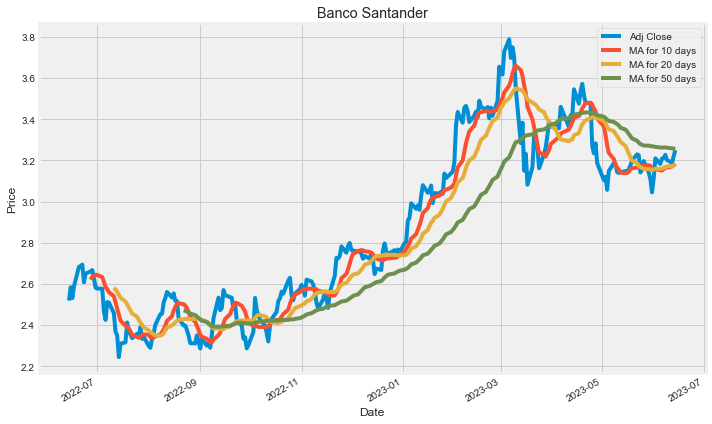

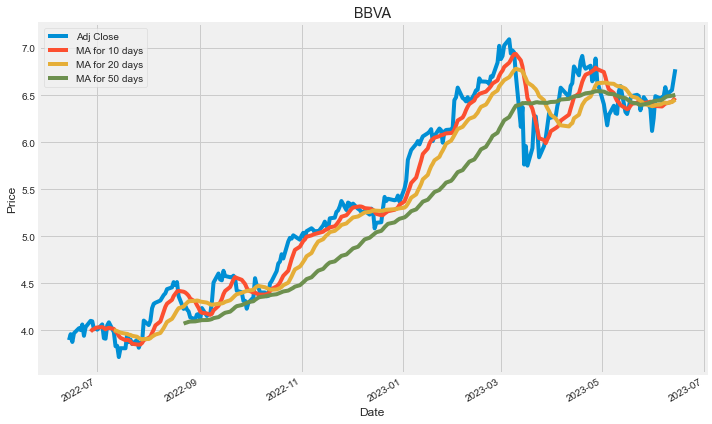

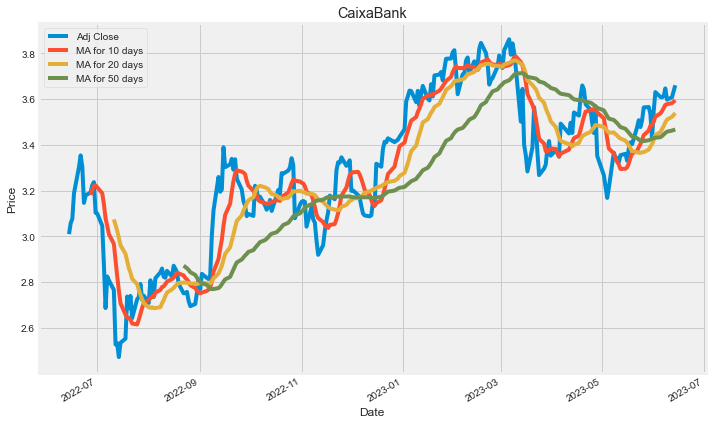

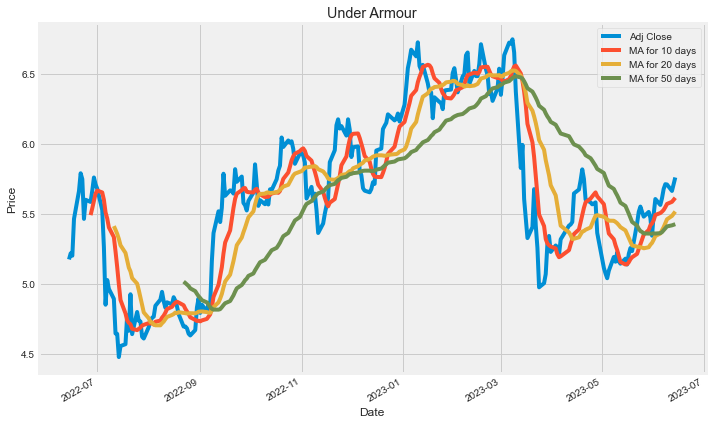

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    bancos_data['SAN.MC'][f"MA for {ma} days"] = bancos_data['SAN.MC']['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

bancos_data['SAN.MC'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('Banco Santander')
axes.set_ylabel('Price')

fig.tight_layout()
plt.show()

for ma in ma_day:
    bancos_data['BBVA.MC'][f"MA for {ma} days"] = bancos_data['BBVA.MC']['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

bancos_data['BBVA.MC'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('BBVA')
axes.set_ylabel('Price')

fig.tight_layout()
plt.show()

for ma in ma_day:
    bancos_data['CABK.MC'][f"MA for {ma} days"] = bancos_data['CABK.MC']['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

bancos_data['CABK.MC'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('CaixaBank')
axes.set_ylabel('Price')

fig.tight_layout()
plt.show()

for ma in ma_day:
    bancos_data['BKT.MC'][f"MA for {ma} days"] = bancos_data['BKT.MC']['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

bancos_data['BKT.MC'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('Under Armour')
axes.set_ylabel('Price')

fig.tight_layout()
plt.show()

# 3. ¿Cuál fue la rentabilidad diaria media de la acción?

La rentabilidad diaria de una acción se refiere al cambio porcentual en el precio de una acción en un solo día en comparación con el precio de cierre del día anterior. Se calcula utilizando la siguiente fórmula:

Rentabilidad diaria = ((Precio de cierre actual - Precio de cierre del día anterior) / Precio de cierre del día anterior) * 100

La rentabilidad diaria es una medida utilizada para evaluar el rendimiento de una acción en un período de tiempo específico. Puede indicar si el precio de la acción está aumentando o disminuyendo, y proporciona una medida relativa de la variación diaria en el valor de una acción.

## 3.1 Código

Este código calcula y traza la rentabilidad diaria de las acciones de diferentes bancos. Aquí está el resumen de lo que hace:

1. Para cada banco (Santander, BBVA, Caixabank y Bankinter), se calcula la rentabilidad diaria utilizando el método pct_change() aplicado al precio de cierre ajustado ('Adj Close'). La rentabilidad diaria se almacena en una columna llamada 'Daily Return' en el DataFrame bancos_data.

2. A continuación, se crea un gráfico para cada banco que muestra la rentabilidad diaria como un porcentaje a lo largo del tiempo. Se utilizan subplots para mostrar los gráficos en una sola figura.

3. Cada gráfico tiene el eje y etiquetado como 'Daily Return' y el título correspondiente al nombre del banco.

4. Se ajusta el diseño de la figura para que los gráficos se muestren de manera ordenada.

5. Finalmente, se muestra cada figura de forma individual utilizando plt.show(), lo que permite visualizar los gráficos de la rentabilidad diaria para cada banco.

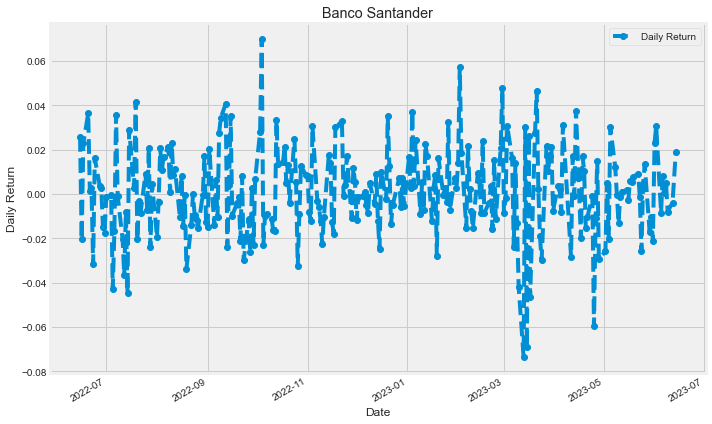

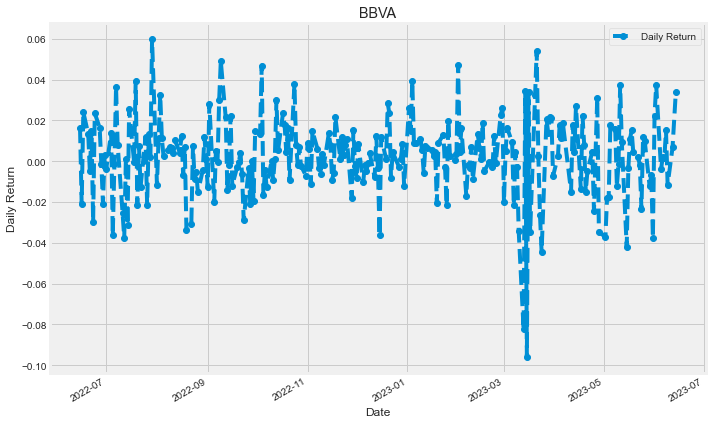

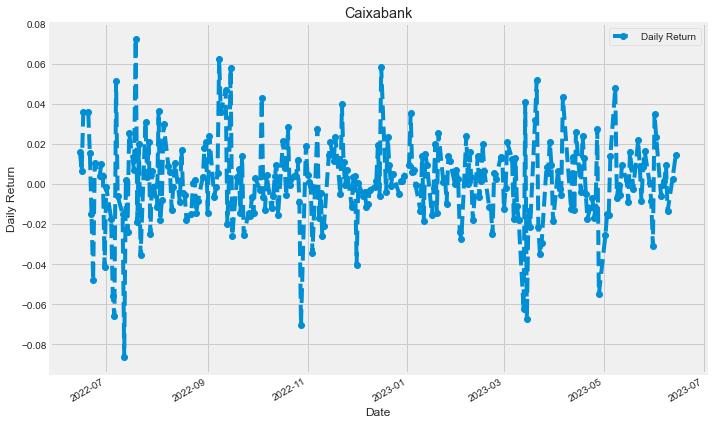

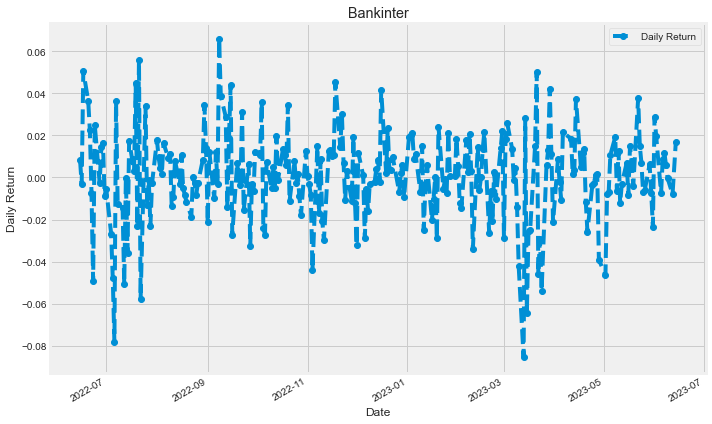

In [9]:
# We'll use pct_change to find the percent change for each day
bancos_data['SAN.MC']['Daily Return'] = bancos_data['SAN.MC']['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

bancos_data['SAN.MC']['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('Banco Santander')
axes.set_ylabel('Daily Return')

fig.tight_layout()
plt.show()

# We'll use pct_change to find the percent change for each day
bancos_data['BBVA.MC']['Daily Return'] = bancos_data['BBVA.MC']['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

bancos_data['BBVA.MC']['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('BBVA')
axes.set_ylabel('Daily Return')

fig.tight_layout()
plt.show()

# We'll use pct_change to find the percent change for each day
bancos_data['CABK.MC']['Daily Return'] = bancos_data['CABK.MC']['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

bancos_data['CABK.MC']['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('Caixabank')
axes.set_ylabel('Daily Return')

fig.tight_layout()
plt.show()

# We'll use pct_change to find the percent change for each day
bancos_data['BKT.MC']['Daily Return'] = bancos_data['BKT.MC']['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

bancos_data['BKT.MC']['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('Bankinter')
axes.set_ylabel('Daily Return')

fig.tight_layout()
plt.show()


Ahora echemos un vistazo general a la rentabilidad media diaria utilizando un histograma. Utilizaremos seaborn para crear un histograma y un gráfico kde en la misma figura.

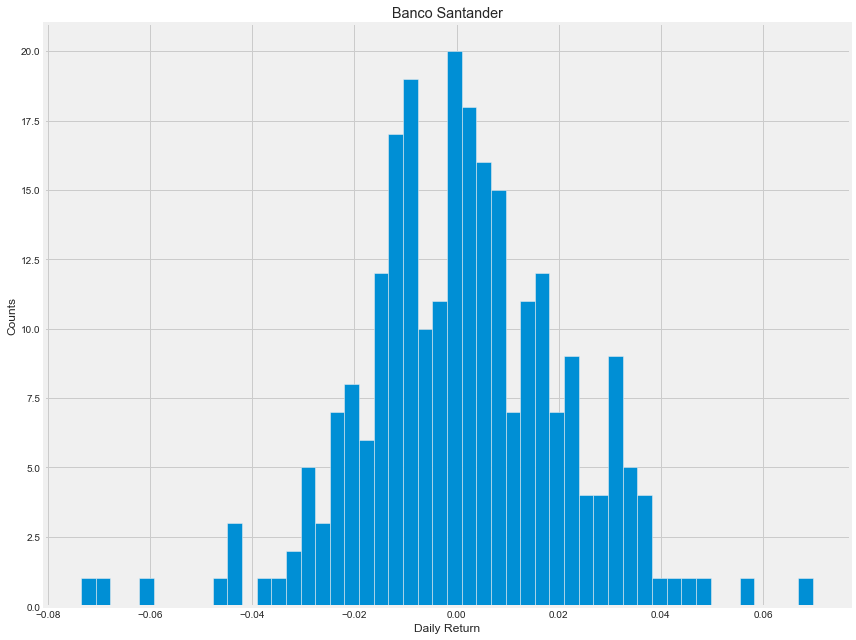

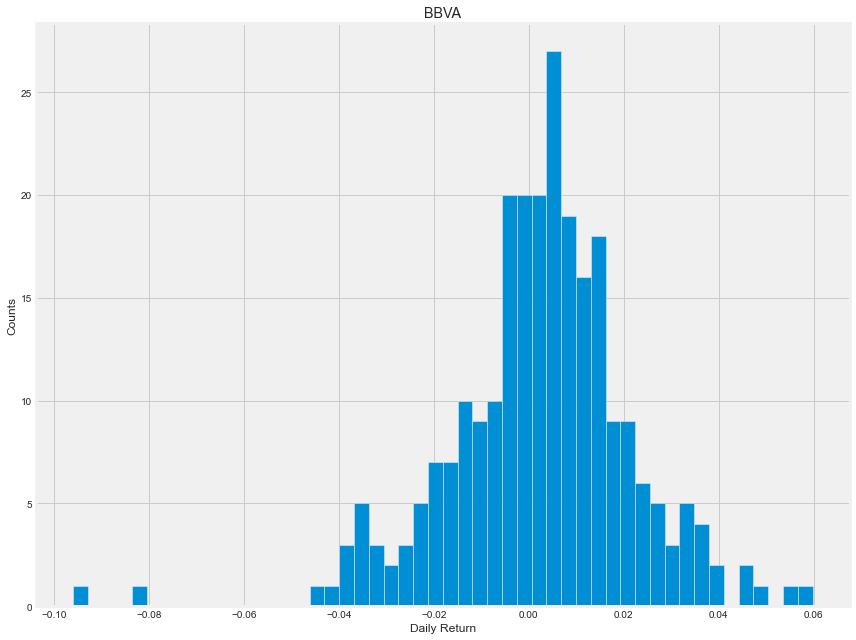

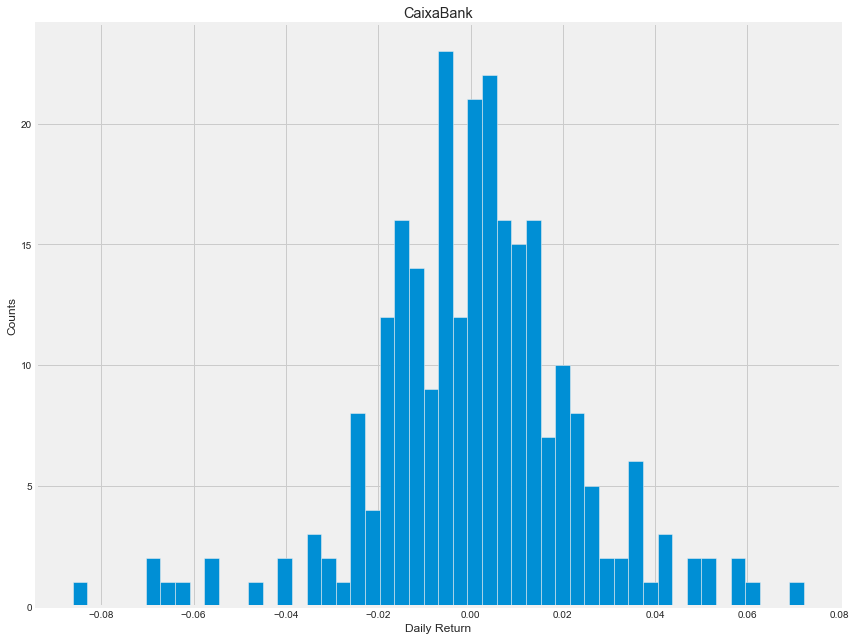

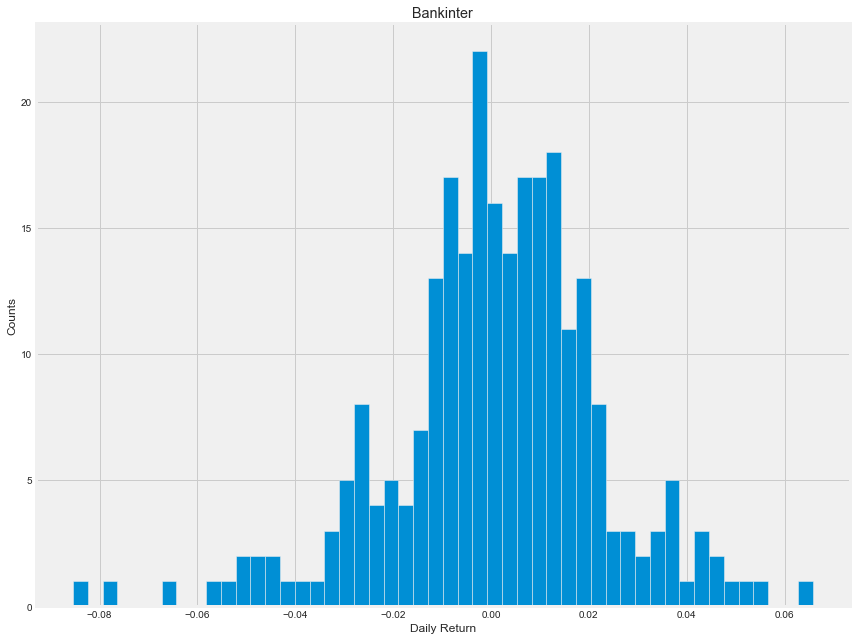

In [10]:
plt.figure(figsize=(12, 9))

bancos_data['SAN.MC']['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Banco Santander')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9))

bancos_data['BBVA.MC']['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('BBVA')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9))

bancos_data['CABK.MC']['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('CaixaBank')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9))

bancos_data['BKT.MC']['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Bankinter')

plt.tight_layout()
plt.show()

# 4. ¿Cuál es la correlación entre los precios de cierre de las distintas acciones?
La correlación de precios entre distintas acciones es una medida estadística que indica la relación o la fuerza de la asociación entre los precios de dos o más acciones. La correlación se calcula utilizando técnicas estadísticas, siendo el coeficiente de correlación de Pearson el más comúnmente utilizado.

El coeficiente de correlación de Pearson, que varía entre -1 y 1, cuantifica la dirección y la intensidad de la relación lineal entre dos variables. Si el coeficiente es cercano a 1, indica una correlación positiva fuerte, lo que significa que los precios de las acciones tienden a moverse en la misma dirección. Si el coeficiente es cercano a -1, indica una correlación negativa fuerte, lo que significa que los precios de las acciones tienden a moverse en direcciones opuestas. Por otro lado, si el coeficiente es cercano a 0, indica una correlación débil o nula, lo que implica que no hay una relación lineal clara entre los precios de las acciones.

In [31]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(bancos_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,BBVA.MC,BKT.MC,CABK.MC,SAN.MC
Date,,,,
2022-06-14,NaN,NaN,NaN,NaN
2022-06-15,0.016094,0.008422,0.015853,0.025734
2022-06-16,-0.021002,-0.003268,0.006426,-0.020442
2022-06-17,0.024089,0.050638,0.036181,0.022956
2022-06-20,0.013341,0.036408,0.036092,0.036350


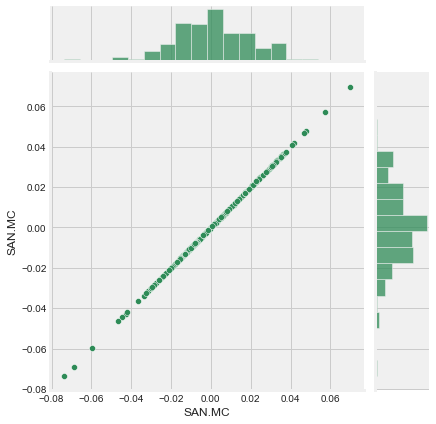

In [32]:
# Comparing Santander to itself should show a perfectly linear relationship
sns.jointplot(x='SAN.MC', y='SAN.MC', data=tech_rets, kind='scatter', color='seagreen')

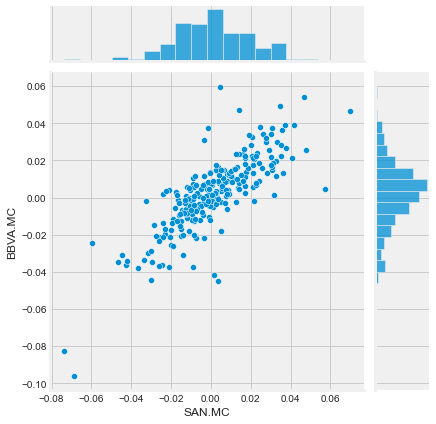

In [33]:
# We'll use joinplot to compare the daily returns of Santander and BBVA
sns.jointplot(x='SAN.MC', y='BBVA.MC', data=tech_rets, kind='scatter')

Así que ahora podemos ver que si dos acciones están perfectamente (y positivamente) correlacionadas entre sí, debería producirse una relación lineal entre sus valores de rentabilidad diaria.

Seaborn y pandas hacen que sea muy fácil repetir este análisis de comparación para cada combinación posible de valores en nuestra lista de valores tecnológicos. Podemos utilizar sns.pairplot() para crear automáticamente este gráfico

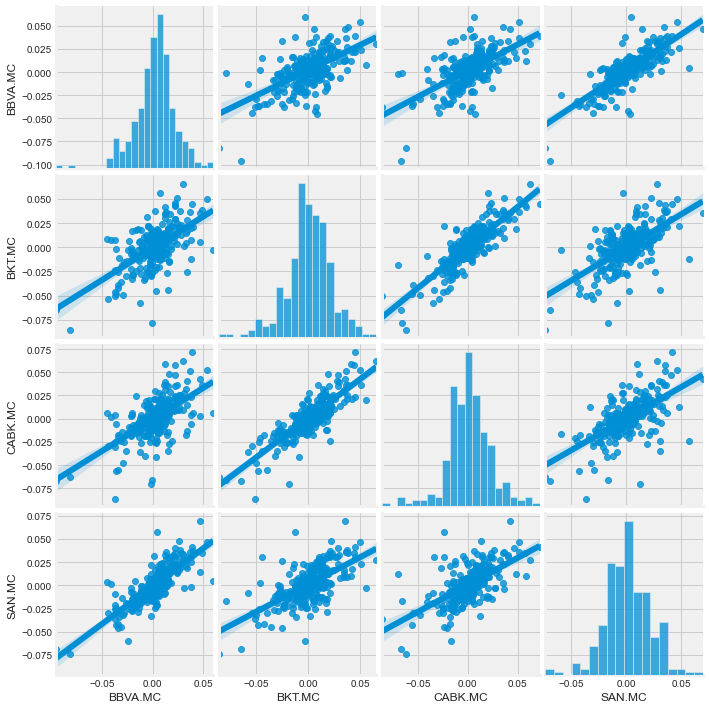

In [34]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Arriba podemos ver todas las relaciones en los rendimientos diarios entre todas las acciones. Un rápido vistazo muestra una interesante correlación entre los rendimientos diarios de Santander y BBVA. Podría ser interesante investigar esa comparación individual.

Aunque la simplicidad de llamar simplemente a sns.pairplot() es fantástica, también podemos utilizar sns.PairGrid() para tener un control total de la figura, incluyendo qué tipo de gráficos van en la diagonal, en el triángulo superior y en el triángulo inferior. A continuación se muestra un ejemplo de la utilización de toda la potencia de seaborn para lograr este resultado.

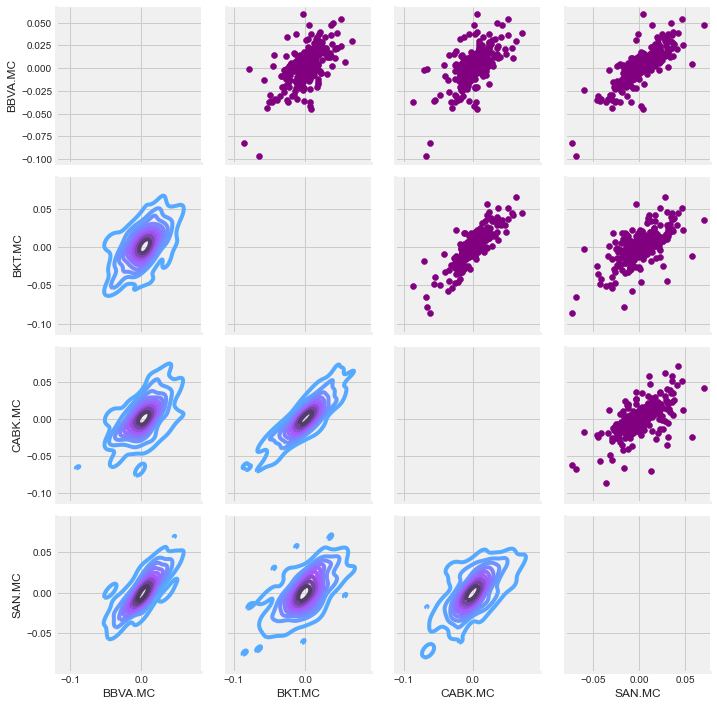

In [35]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

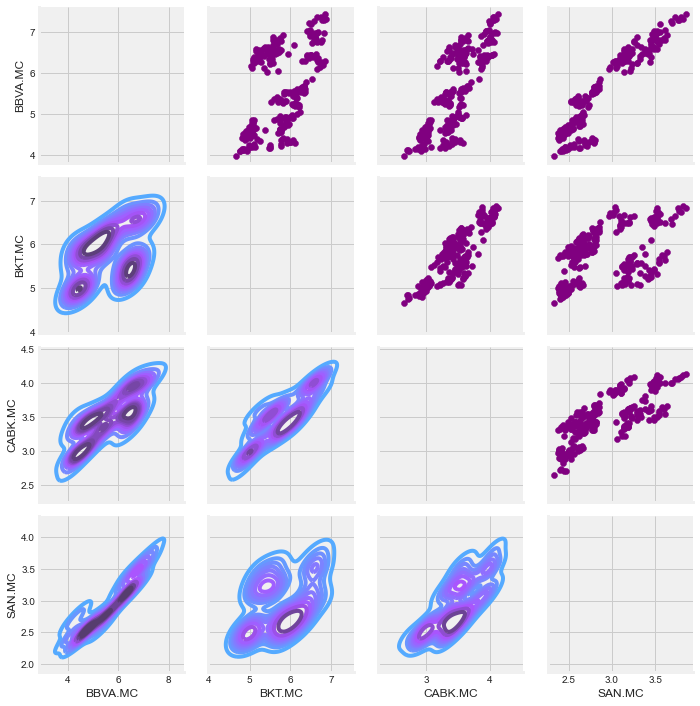

In [36]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Por último, también podríamos hacer un gráfico de correlación, para obtener valores numéricos reales de la correlación entre los valores de rentabilidad diaria de las acciones. Comparando los precios de cierre, vemos una relación interesante entre Santander y BBVA.

Text(0.5, 1.0, 'Correlation of stock closing price')

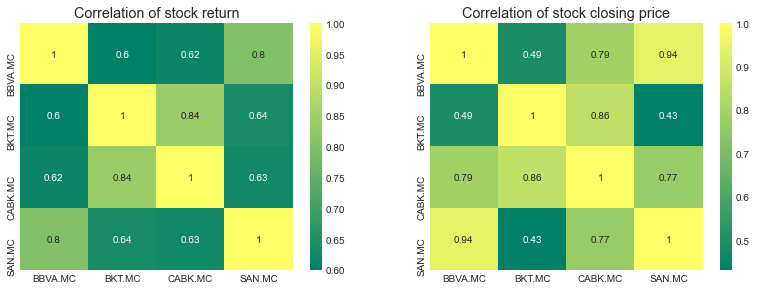

In [37]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Tal y como sospechábamos en nuestro PairPlot, aquí vemos numérica y visualmente que BBVA y Santander presentan la mayor correlación de rentabilidad bursátil diaria. También es interesante ver que todas las empresas bancarias están correlacionadas positivamente.

# 5. ¿Cuánto valor ponemos en riesgo al invertir en una acción concreta?
El riesgo al invertir en una acción se refiere a la incertidumbre o la posibilidad de obtener resultados negativos o diferentes a los esperados al realizar una inversión en esa acción. El riesgo está relacionado con la volatilidad de los rendimientos de la acción, es decir, con la variabilidad de los precios a lo largo del tiempo. Un mayor riesgo implica una mayor posibilidad de pérdidas o de obtener rendimientos inesperados. 

Este código genera un gráfico de dispersión que muestra el riesgo (medido por la desviación estándar) en función del rendimiento esperado de diferentes acciones. Cada punto en el gráfico representa una acción, y las etiquetas proporcionan información sobre el nombre de la acción. Esto permite visualizar y comparar el riesgo y el rendimiento esperado de diferentes acciones en un solo gráfico.

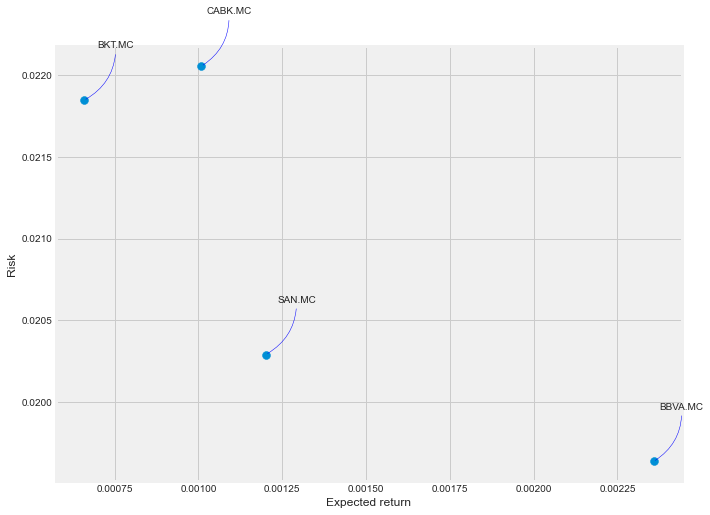

In [18]:
import numpy as np
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Prediciendo el closing price stock price del Banco Santander:
En resumen, este código carga los datos históricos de cotización de acciones de Banco Santander, los escala, crea conjuntos de entrenamiento y prueba, construye y entrena un modelo de redes neuronales LSTM, Random Forest Regresor y XGBoost Regresor, comparándolos para ver cuál es capaz de predecir de una manera más eficaz el precio de cierre de las acciones de Banco Sanander.

In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('SAN.MC', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,5.514061,5.655448,5.485784,5.623400,2.830388,27061535
2012-01-03,5.634711,5.685610,5.497095,5.676184,2.856955,140497113
2012-01-04,5.449024,5.551764,5.391527,5.457507,2.746890,120575547
2012-01-05,5.457507,5.457507,5.189816,5.211495,2.623066,166994908
2012-01-06,5.263336,5.272762,5.077649,5.137031,2.585586,91659069
...,...,...,...,...,...,...
2023-06-07,3.225000,3.245000,3.172500,3.211000,3.211000,17772409
2023-06-08,3.235500,3.270000,3.200500,3.227000,3.227000,22981423
2023-06-09,3.230000,3.236500,3.168000,3.201500,3.201500,17889217


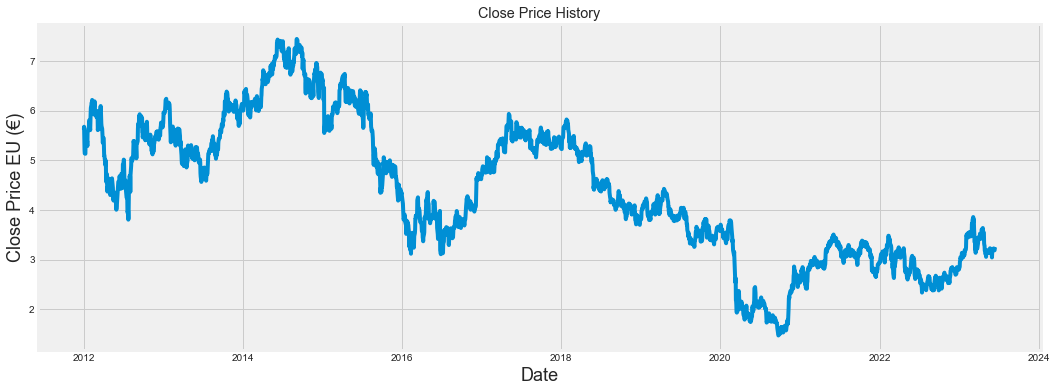

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price EU (€)', fontsize=18)
plt.show()

In [21]:
# Creamos un nuevo dataframe con solo la columna 'Close'.
data = df.filter(['Close'])

# Convertimos el dataframe a un array de numpy
dataset = data.values

# Obtener la longitud de los datos de entrenamiento:
# Calcula la variable training_data_len como el número de filas en el dataset multiplicado por 0.95 
# y redondeado hacia arriba utilizando la función np.ceil(). Esto representa el número de filas que se utilizarán 
# para entrenar el modelo.
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2782

In [22]:
#Escalar los datos:

#Utilizamos la clase MinMaxScaler de sklearn.preprocessing para escalar los datos en el rango de 0 a 1. 
#La escala es importante para mejorar el rendimiento de algunos algoritmos de aprendizaje automático.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.69501289],
       [0.70385306],
       [0.66722939],
       ...,
       [0.28939704],
       [0.28730355],
       [0.29751975]])

In [23]:
# Dividir los datos en conjuntos x_train y y_train:

#Utiliza un bucle for para recorrer los datos de entrenamiento desde el índice 60 hasta el final. 
#En cada iteración, se agregan los últimos 60 elementos anteriores al índice actual a la lista x_train,
#y se agrega el valor en el índice actual a la lista y_train. 
#Esto se hace para crear conjuntos de datos de entrada y salida que se utilizarán para entrenar el modelo.

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.69501289, 0.70385306, 0.66722939, 0.62602767, 0.61355659,
       0.61276742, 0.65933628, 0.6563369 , 0.65002246, 0.66091495,
       0.6467074 , 0.65617918, 0.63881436, 0.68333106, 0.68648841,
       0.69722293, 0.69722293, 0.70337941, 0.72532212, 0.72405929,
       0.69785431, 0.69248708, 0.72611137, 0.74852773, 0.76762878,
       0.7793106 , 0.78625642, 0.78278339, 0.79430726, 0.77362753,
       0.77615326, 0.76699741, 0.77141749, 0.74537039, 0.7655767 ,
       0.78957148, 0.78657211, 0.75910429, 0.746002  , 0.7450547 ,
       0.74300262, 0.74284466, 0.73621453, 0.7532635 , 0.75720994,
       0.73668818, 0.69264489, 0.7003802 , 0.72800573, 0.71948125,
       0.69674928, 0.72690071, 0.73305727, 0.73889822, 0.75342146,
       0.7737855 , 0.7614723 , 0.73700386, 0.71521912, 0.70606311])]
[0.6967492848595993]

[array([0.69501289, 0.70385306, 0.66722939, 0.62602767, 0.61355659,
       0.61276742, 0.65933628, 0.6563369 , 0.65002246, 0.66091495,
       0.6467074 , 0.65617918, 0.638

## 6.1 Modelo LSTM
El modelo LSTM utiliza celdas de memoria y puertas para capturar y procesar información a lo largo de las secuencias de datos. Esto le permite mantener información a largo plazo y capturar dependencias complejas en los datos secuenciales. El estado oculto final generado por la LSTM se puede utilizar para realizar diversas tareas de aprendizaje automático.

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Construir el modelo LSTM:

#Se crea una instancia de Sequential llamada model que representa el modelo de la red neuronal.
#Se agrega una capa LSTM con 128 unidades y return_sequences=True para retornar secuencias en lugar de un único valor de salida. La forma de entrada se especifica utilizando input_shape como (x_train.shape[1], 1), donde x_train.shape[1] representa la longitud de la secuencia y 1 representa el número de características.
#Se agrega otra capa LSTM con 64 unidades y return_sequences=False para no retornar secuencias, sino solo un único valor de salida.
#Se agrega una capa Dense con 25 unidades.
#Se agrega una capa de salida Dense con 1 unidad, que representa la predicción del modelo.
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilar el modelo:

#Se utiliza el método compile() del modelo para especificar el optimizador y la función de pérdida. 
#En este caso, se utiliza el optimizador Adam y la función de pérdida de error cuadrático medio (mean_squared_error).
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2722/2722 [==============================] - 68s 23ms/step - loss: 0.0017


In [25]:
from sklearn.model_selection import train_test_split

# La función train_test_split divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba. Los argumentos utilizados son los siguientes:

#x_train: Los datos de entrada para el entrenamiento del modelo.
#y_train: Los datos de salida correspondientes para el entrenamiento del modelo.
#test_size: La proporción del conjunto de datos que se utilizará para la prueba. En este caso, se establece en 0.2, lo que significa que el 20% de los datos se utilizará para la prueba.
#random_state: La semilla utilizada por el generador de números aleatorios para garantizar la reproducibilidad de la división de los datos. En este caso, se establece en 42, pero se puede cambiar a otro número si se desea una división aleatoria diferente.
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions
y_pred = model.predict(x_test)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

18/18 [==============================] - 1s 25ms/step
Mean Squared Error (MSE): 0.0006663509816170038
Mean Absolute Error (MAE): 0.020130791472997005


## 6.2 Random Forest Regresor

Random Forest Regressor construye un conjunto de árboles de decisión aleatorios y combina sus predicciones para obtener una predicción final en problemas de regresión. Es un algoritmo robusto, flexible y eficaz para abordar problemas de predicción numérica, y también proporciona información sobre la importancia de las características.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear una instancia del modelo Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Redimensionar los datos
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], -1))

# Entrenar el modelo
model.fit(x_train_reshaped, y_train)

# Hacer predicciones
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], -1))
y_pred = model.predict(x_test_reshaped)

# Calcular MSE y MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.00023790570884079791
Mean Absolute Error (MAE): 0.010696690310339292


## 6.3 XGBoost
XGBoost es un algoritmo de aprendizaje automático basado en árboles de decisión que utiliza la técnica de impulso para combinar múltiples árboles en un modelo fuerte. Utiliza una función de costo personalizada basada en gradientes y técnicas de regularización para mejorar la precisión y evitar el sobreajuste. XGBoost se ha convertido en una opción popular para una variedad de problemas de aprendizaje automático debido a su eficacia y rendimiento.

In [28]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Redimensionar los datos
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], -1))

# Crear el modelo XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entrenar el modelo
model.fit(x_train_reshaped, y_train)

# Hacer predicciones
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], -1))
y_pred = model.predict(x_test_reshaped)

# Calcular MSE y MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.0002562436298911791
Mean Absolute Error (MAE): 0.011166057659509438


# 7. Conclusión

Basándonos en los datos proporcionados, podemos sacar algunas conclusiones sobre la predicción de cierres de acciones del Banco Santander:

El modelo que mejor funcionó para la predicción fue el model Random Forest Regressor.

Mean Squared Error (MSE): El MSE es una medida de la calidad de la predicción, donde valores más cercanos a cero indican una mejor precisión del modelo. En este caso, el MSE obtenido es de 0.0002379, lo cual indica que, en promedio, las predicciones del modelo tienen un error cuadrático medio bajo. Esto sugiere que el modelo tiene una buena capacidad de ajuste a los datos y puede predecir con precisión los cierres de acciones del Banco Santander.

Mean Absolute Error (MAE): El MAE es otra métrica de evaluación que indica el error absoluto promedio entre las predicciones y los valores reales. En este caso, el MAE obtenido es de 0.01069, lo cual indica que, en promedio, las predicciones del modelo difieren en aproximadamente 0.011 unidades de los valores reales. Un MAE bajo sugiere que el modelo tiene una buena capacidad de predicción y puede proporcionar estimaciones cercanas a los valores reales.

En general, los resultados indican que el modelo ha logrado capturar los patrones subyacentes en los datos históricos de los cierres de acciones del Banco Santander y puede proporcionar predicciones precisas. Sin embargo, es importante considerar que estas conclusiones se basan únicamente en las métricas de evaluación proporcionadas y no tienen en cuenta otros factores relevantes. Es recomendable realizar un análisis más detallado y evaluar el modelo en diferentes escenarios antes de tomar decisiones basadas en las predicciones.